In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [56]:
%matplotlib widget

In [7]:
#open file and get an array of each line
file = open(r'ccrescentus.fa','r')
data_gene = file.readlines()
file.close()

Data Preparation

In [8]:
#strip all white spaces and remove header and return a concatenated string
geneticcode = ''
for line in data_gene[1:]:
    geneticcode += line.strip()



In [9]:
#count the presence of each genome
aCount = geneticcode.count('a')
gCount = geneticcode.count('g')
cCount = geneticcode.count('c')
tCount = geneticcode.count('t')

snip = geneticcode[0:30]
print('Snip of code \n'+ snip)
print((snip.count('a')+snip.count('g')+snip.count('c')+snip.count('t')) == len(snip))

Snip of code 
gccgatagcctatgatccccggcaggcccg
True


Converting Text to a Numerical Table

In [10]:
#cut string into 300 characters each
size = 300
i = 0
cut_data = []
while i != len(geneticcode):
    if len(geneticcode)-i <size:
        cut_data.append(geneticcode[i:]) 
    cut_data.append(geneticcode[i:i+size])
    i+=size
cut_data

['gccgatagcctatgatccccggcaggcccggggcttggagccgtctggtttggatggaaccctccaaaccagatcaagaggctcctagaacgccgcccgcagggtcacgccccaggtgcgcgggtcgcccggctggccggcgatcaggccggtgttgctgggacccacggccagttgctcgaaatagttctcgtcgaaggcgttgcggacccaggcatagaggttcagcccctcaggcgtgcggaagccggcccggaagttagcgatcgtgtagccgtcaacccaggtgtagatcgaggg',
 'cgaagggttggacgagaacttgctgcggtagctgccgtcatagccgacatagaactcgcccgtcttgcccaggaagtcgcccggaacattggcctcggcccccagggccacgctccacttcgaaacgcccggcagccgctgacccgagacgtcgcagttggcggggctgagcgcgccggccacgccggccgcgcgcggaacctgggttccggtcgccaccgtgccgcccgacagttccggcgggcagggcgcgtcgacaaagcgcacatacttggcgtcggtataggcggcgttcagata',
 'ggtcgagaagcgggcgttcgggcgataggccgagtccagctccacgccttgggtgcgcaccttgccggcgttggccagatagccgcgcagcacgcccagctggccgttgctcaccgtggcctggtagttcttgatgtcgctgcggaacaccgcaaggttggccgtcagggtgcggtccagccactgggtcttcaggccgccctcgaagtgattgatgtcctcgggcttgatcgcgcctgcggcctcgatcggcttgcccgccgcatcggtcggcaggccgttctggttgatgccgccggt',
 'cttgaagctcttggcgtaggtggcgtaggccaggacgtcacggtccagctggtagcttgccgacaggtcgtaggtgaagttcc

In [11]:
#Create a combination of lists with words possible
from itertools import product

letters = ['a','g','c','t']
wordbank1 = []
wordbank2 = []
wordbank3 = []
wordbank4 = []
length4 = product(letters,repeat=4)
length3 = product(letters,repeat=3)
length2 = product(letters,repeat=2)
length1 = product(letters,repeat=1)

wordDict = {}
lettersSize = range(1,5)
for item in length1:
    s = ''
    for comboletters in item:
        s += comboletters
    wordbank1.append(s)

for item in length2:
    s = ''
    for comboletters in item:
        s += comboletters
    wordbank2.append(s)

for item in length3:
    s = ''
    for comboletters in item:
        s += comboletters
    wordbank3.append(s)

for item in length4:
    s = ''
    for comboletters in item:
        s += comboletters
    wordbank4.append(s)

wordDict = {1:wordbank1,2:wordbank2,3:wordbank3,4:wordbank4}
wordDict[1]
wordDict[2]



['aa',
 'ag',
 'ac',
 'at',
 'ga',
 'gg',
 'gc',
 'gt',
 'ca',
 'cg',
 'cc',
 'ct',
 'ta',
 'tg',
 'tc',
 'tt']

Count sequence of characters in Genetic Data

freq = {}

#create a data table for worddictionary values
for key in wordDict:
    gene_df = pd.DataFrame(columns=wordDict[key]) #look through value and add as column to the table

    for index,letters in enumerate(geneticcode):
        gene_df.loc[index] = np.zeros(len(wordDict[key]))
#iterate through each key then all the values
        while len(letters)> 0: #iterate through genetic string
            #check to see if dictionary value in genetic string
            
            x = geneticcode[0:key]
            gene_df.loc[index,x] +=1
                #count the value and update the table
            letters = letters[key:]



    freq[key] = gene_df
freq[2]



In [14]:
freqTables = {}
for i in range(1,5):
    # create an empty dataFrame with columns being the words on the dictionary
    df = pd.DataFrame(columns = wordDict[i])
    for index, dataP in enumerate(cut_data):
        # we create a row with zero values corresponding to a data point
        df.loc[index] = np.zeros(len(wordDict[i]))
        while len(dataP) > 0:
            # get the left part of the data point (i characters)
            left = dataP[0:i]
            # find it in the respective column and count it there
            df.loc[index, left] += 1
            dataP = dataP[i:]
    freqTables[i] = df

freqTables[2].head()

,aa,ag,ac,at,ga,gg,gc,gt,ca,cg,cc,ct,ta,tg,tc,tt
0,6.0,17.0,6.0,6.0,4.0,20.0,16.0,11.0,6.0,10.0,21.0,3.0,3.0,6.0,10.0,5.0
1,7.0,8.0,6.0,2.0,5.0,17.0,22.0,8.0,12.0,19.0,17.0,7.0,4.0,6.0,4.0,6.0
2,0.0,11.0,5.0,5.0,8.0,14.0,21.0,7.0,6.0,19.0,14.0,5.0,1.0,12.0,13.0,9.0
3,4.0,10.0,7.0,0.0,6.0,17.0,20.0,11.0,9.0,18.0,9.0,9.0,6.0,13.0,6.0,5.0
4,3.0,14.0,5.0,4.0,12.0,14.0,16.0,8.0,7.0,12.0,10.0,11.0,0.0,15.0,11.0,8.0


In [23]:
new_df = pd.DataFrame(freqTables[4])
new_df.head()

,aaaa,aaag,aaac,aaat,aaga,aagg,aagc,aagt,aaca,aacg,...,ttgc,ttgt,ttca,ttcg,ttcc,ttct,ttta,tttg,tttc,tttt
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Standardize data to run PCA

In [ ]:
from sklearn.preprocessing import StandardScaler

In [30]:
standardizedData = {}
stndrd = StandardScaler()
for i in freqTables:
    data = freqTables[i]
    data = stndrd.fit_transform(data) #standardize and fit our data

    standardizedData[i] = pd.DataFrame(data,columns=wordDict[i])
standardizedData[2]

,aa,ag,ac,at,ga,gg,gc,gt,ca,cg,cc,ct,ta,tg,tc,tt
0,0.678394,3.017473,-0.364310,0.366334,-1.939741,1.320479,-0.624884,1.380430,-0.705184,-2.260329,1.785883,-1.603402,0.896849,-0.830630,-0.044287,0.238082
1,1.069509,0.059464,-0.364310,-1.376645,-1.620944,0.566449,0.680506,0.297176,1.269591,-0.173082,0.737849,-0.319671,1.572475,-0.830630,-1.920952,0.619989
2,-1.668296,1.045467,-0.696601,-0.069411,-0.664553,-0.187581,0.462941,-0.063909,-0.705184,-0.173082,-0.048177,-0.961536,-0.454403,1.146937,0.894045,1.765711
3,-0.103836,0.716799,-0.032020,-2.248135,-1.302147,0.566449,0.245376,1.380430,0.282203,-0.404998,-1.358219,0.322195,2.923727,1.476531,-1.295397,0.238082
4,-0.494951,2.031470,-0.696601,-0.505156,0.610636,-0.187581,-0.624884,0.297176,-0.376055,-1.796497,-1.096210,0.964061,-1.130029,2.135720,0.268490,1.383804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,-0.886066,0.059464,-0.364310,0.802079,1.248230,2.074508,0.027811,-1.508248,-0.046926,-0.404998,-2.144244,0.001262,-0.454403,0.817342,-0.982620,1.765711
1013,-0.103836,-0.597871,-0.696601,0.366334,-1.302147,-0.438924,-0.624884,1.019346,0.611332,-1.332664,-0.572193,0.964061,0.221223,2.135720,0.268490,1.765711
1014,-0.103836,0.059464,-1.693471,0.366334,-0.664553,0.315106,0.245376,-0.786078,-1.363443,-0.636915,-1.358219,0.643128,2.248101,0.158154,0.581268,4.057155
1015,-1.277181,-0.926539,-0.696601,-0.069411,-1.302147,-0.187581,0.462941,0.297176,-0.046926,-0.636915,-1.358219,2.568726,1.572475,-1.489819,2.457933,1.765711


In [31]:
print(standardizedData[2].loc[:, 'gt'].mean())
print(standardizedData[2].loc[:, 'gt'].std())

-7.352361918240343e-17
1.0004920049498138


PCA Anaylsis

In [41]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components=2) #n_components is the amount of components we want to reduce our features to

In [50]:
pcaTable = {}
for i in standardizedData:
    dataPCA = pca.fit_transform(standardizedData[i])
    pcaTable[i] = pd.DataFrame(dataPCA,columns=['pca1','pca2'])

Check Shape of Tables for reduction

In [52]:
pcaTable[3].shape

(1017, 2)

Plot Data

In [53]:
pcaTable[1].head()

,pca1,pca2
0,0.525495,0.259081
1,-0.355099,-0.762742
2,-0.292828,1.772081
3,0.131704,1.761905
4,1.411201,2.342831


<bound method Figure.tight_layout of <Figure size 792x576 with 4 Axes>>

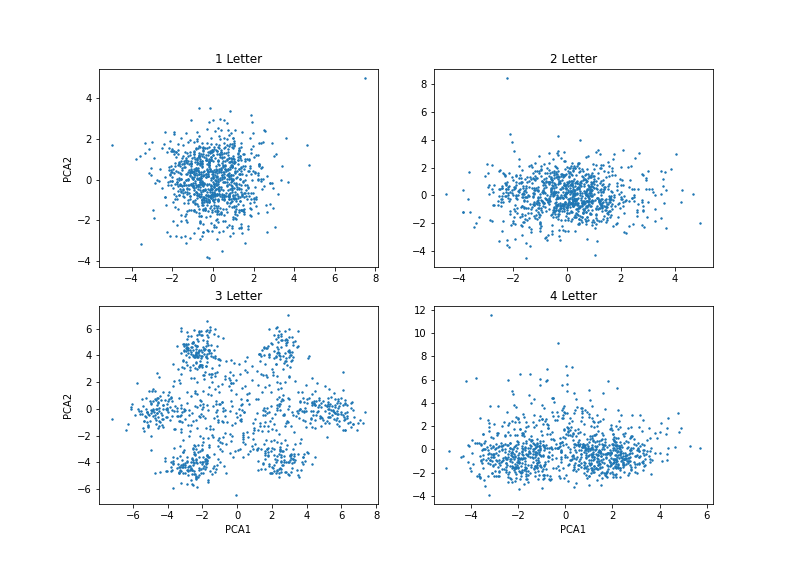

In [75]:
fig,ax = plt.subplots(2,2,figsize=(11,8))
ax[0,0].scatter(pcaTable[1]['pca1'],pcaTable[1]['pca2'],s=2)
ax[0,1].scatter(pcaTable[2]['pca1'],pcaTable[2]['pca2'],s=2)
ax[1,0].scatter(pcaTable[3]['pca1'],pcaTable[3]['pca2'],s=2)
ax[1,1].scatter(pcaTable[4]['pca1'],pcaTable[4]['pca2'],s=2)
#set labels
ax[1,0].set_xlabel('PCA1')
ax[1,1].set_xlabel('PCA1')
ax[0,0].set_ylabel('PCA2')
ax[1,0].set_ylabel('PCA2')
#set title
ax[0,0].set_title('1 Letter')
ax[0,1].set_title('2 Letter')
ax[1,0].set_title('3 Letter')
ax[1,1].set_title('4 Letter')
fig.tight_layout



K Means Clustering Algorithim

In [76]:
from sklearn.cluster import KMeans 

In [77]:
#initialize objects
kmeans6 = KMeans(n_clusters=6)
kmeans7 = KMeans(n_clusters=7)

In [78]:
#fit data
kmeans6.fit(standardizedData[3])
kmeans7.fit(standardizedData[3])

KMeans(n_clusters=7)

In [80]:
type(kmeans6)

sklearn.cluster._kmeans.KMeans

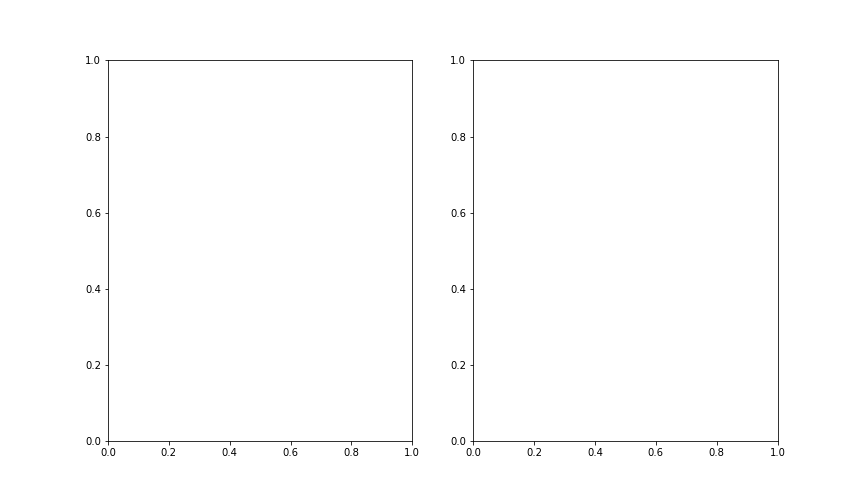

In [90]:
fig2, ax2 = plt.subplots(1,2,figsize=(12,7))

In [97]:
ax2[0].scatter(pcaTable[3]['pca1'],pcaTable[3]['pca2'],s=6,c=kmeans6.labels_)

In [96]:
ax2[1].scatter(pcaTable[3]['pca1'],pcaTable[3]['pca2'],s=6,c=kmeans7.labels_)

In [93]:
fig2.suptitle('Kmeans 6 vs 7 clusters')
ax2[0].set_ylabel('PCA2')
ax2[1].set_xlabel('PCA1')
ax2[0].set_xlabel('PCA1')

Text(0.5, 63.0, 'PCA1')

In [94]:
fig.tight_layout

<bound method Figure.tight_layout of <Figure size 1188x864 with 4 Axes>>